#Image Classification

- Nama        : Algi Atian Akhyar
- Email       : algiwarg97@gmail.com
- Id Dicoding : algia3

In [30]:


import zipfile
import os
import PIL
import numpy as np
import tensorflow as tf
import matplotlib.image as pmg
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

In [31]:

file_id = '1X26CyD3oq3nlsSYjfIRr6hEdQmdwzvP7'
output_zip = '/content/data.zip'

!gdown --id $file_id -O $output_zip
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1X26CyD3oq3nlsSYjfIRr6hEdQmdwzvP7
To: /content/data.zip
100% 323M/323M [00:05<00:00, 58.0MB/s]


Jumlah gambar gunting :  750
Jumlah gambar Kertas:  712
Jumlah gambar Batu:  726


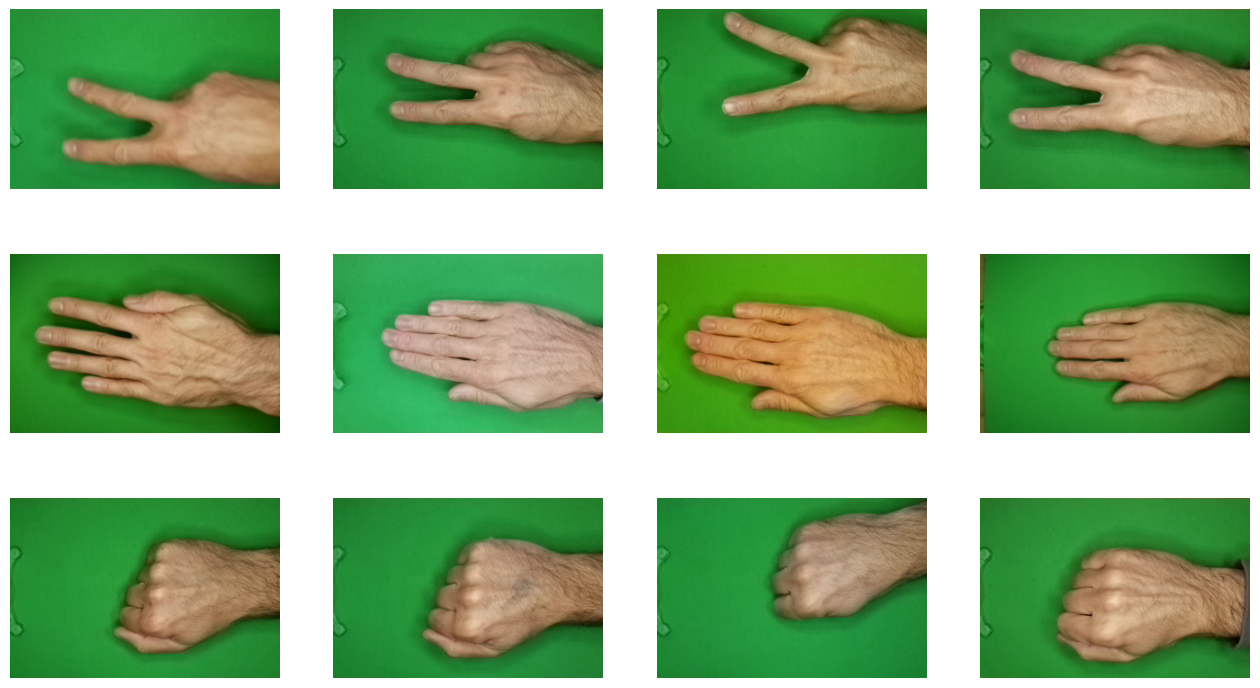

In [32]:
fd_gunting = os.path.join('/content/rockpaperscissors/scissors')
fd_kertas = os.path.join('/content/rockpaperscissors/paper')
fd_batu = os.path.join('/content/rockpaperscissors/rock')

print('Jumlah gambar gunting : ', len(os.listdir(fd_gunting)))
print('Jumlah gambar Kertas: ', len(os.listdir(fd_kertas)))
print('Jumlah gambar Batu: ', len(os.listdir(fd_batu)))

fl_gunting = os.listdir(fd_gunting)
fl_kertas = os.listdir(fd_kertas)
fl_batu = os.listdir(fd_batu)

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows * 3)

pic_index += 4
gbr_gunting = [os.path.join(fd_gunting, fname)
              for fname in fl_gunting[pic_index-4:pic_index]]
gbr_kertas = [os.path.join(fd_kertas, fname)
              for fname in fl_kertas[pic_index-4:pic_index]]
gbr_batu = [os.path.join(fd_batu, fname)
              for fname in fl_batu[pic_index-4:pic_index]]

for i ,img_path in enumerate(gbr_gunting+gbr_kertas+gbr_batu):
  sp = plt.subplot(nrows,ncols, i+ 1)
  sp.axis ('Off')
  img = pmg.imread(img_path)
  plt.imshow(img)
plt.show()


Menggunakan img Generator

In [33]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Melakukan Data Pemisahan data (Train data & Validation data)

In [34]:
Main_dir = '/content/rockpaperscissors/rps-cv-images'
data_Train = ImageDataGenerator(
    rescale = 1./225,

    rotation_range = 40,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',

    validation_split =0.4
)

#### Labeling Data

In [35]:
Train_gen = data_Train.flow_from_directory(
    Main_dir,
    target_size=(150,150),
    class_mode = 'categorical',
    shuffle =True,
    subset ='training'
)
validation_gen = data_Train.flow_from_directory(
    Main_dir,
    target_size=(150,150),
    class_mode = 'categorical',
    shuffle =True,
    subset ='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membangun Model Neural Network

In [36]:
#Menggunakan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 96%!")
      self.model.stop_training = True

callbacks = myCallback()

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 32)       

In [39]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']
              )

In [43]:
history=model.fit(
    Train_gen,
    steps_per_epoch=8,
    epochs=100,
    validation_data = validation_gen,
    validation_steps=4,
    verbose=2,
    callbacks = [callbacks]
)

Epoch 1/100
8/8 - 9s - loss: 0.3956 - accuracy: 0.8438 - val_loss: 0.4418 - val_accuracy: 0.8438 - 9s/epoch - 1s/step
Epoch 2/100
8/8 - 11s - loss: 0.3594 - accuracy: 0.8750 - val_loss: 0.4108 - val_accuracy: 0.8516 - 11s/epoch - 1s/step
Epoch 3/100
8/8 - 12s - loss: 0.5325 - accuracy: 0.7876 - val_loss: 0.4257 - val_accuracy: 0.8438 - 12s/epoch - 1s/step
Epoch 4/100
8/8 - 11s - loss: 0.3947 - accuracy: 0.8398 - val_loss: 0.3533 - val_accuracy: 0.8594 - 11s/epoch - 1s/step
Epoch 5/100
8/8 - 13s - loss: 0.4204 - accuracy: 0.8438 - val_loss: 0.3464 - val_accuracy: 0.8359 - 13s/epoch - 2s/step
Epoch 6/100
8/8 - 11s - loss: 0.3819 - accuracy: 0.8438 - val_loss: 0.3323 - val_accuracy: 0.8984 - 11s/epoch - 1s/step
Epoch 7/100
8/8 - 8s - loss: 0.4550 - accuracy: 0.8186 - val_loss: 0.4901 - val_accuracy: 0.8203 - 8s/epoch - 1s/step
Epoch 8/100
8/8 - 10s - loss: 0.4035 - accuracy: 0.8281 - val_loss: 0.3991 - val_accuracy: 0.8203 - 10s/epoch - 1s/step
Epoch 9/100
8/8 - 11s - loss: 0.3923 - accur

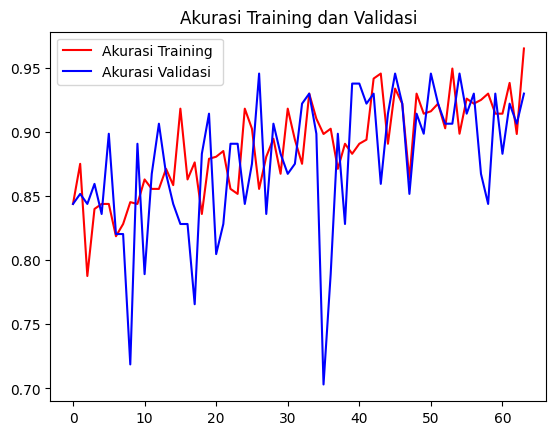

<Figure size 640x480 with 0 Axes>

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

## Uji coba model

Saving 2uxDLQKemRqulhIx.png to 2uxDLQKemRqulhIx.png
1/1 [==============================] - 0s 94ms/step
2uxDLQKemRqulhIx.png
Tangan Ini Menunjukkan bentuk BATU


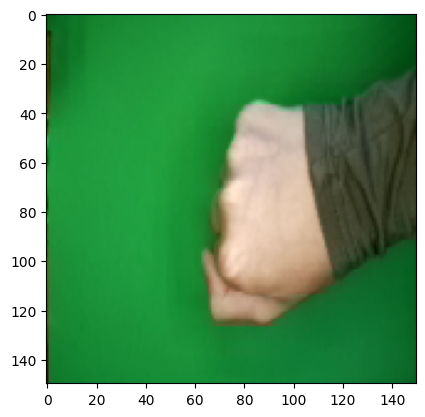

In [45]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini Menunjukkan bentuk KERTAS')
  elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk BATU')
  elif classes[0][2]==1:
    print('Tangan Ini Menunjukkan bentuk GUNTING')
  else:
    print('Tidak Diketahui')
